# Masculinity Survey Insights

In this project, we will be investigating the way people think about masculinity by applying the **K-Means++** algorithm to data from  <a href="https://fivethirtyeight.com/" target = "_blank">FiveThirtyEight</a>. FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

- The questions of the survey are stored in [masculinity-survey.pdf](masculinity-survey.pdf). FiveThirtyEight and WNYC studios used this survey to get their male readers' thoughts on masculinity. 
- Answers to those questions are stored in [masculinity.csv](masculinity.csv). 
- Major takeaways are printed in the FiveThirtyEight's article <a href="https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/" target = "_blank">What Do Men Think It Means To Be A Man?</a>.

We're going to try to find these and other insights using machine learning clustering technique.


## Data Investigation

For starters, we'll take a look at `masculinity-survey.pdf` and then at FiveThirtyEight's article major takeaways:

### Male Identity
- `83%` of men said they felt “very” or “somewhat” masculine.
- `53%` said it was very or somewhat important that others see them that way.
- `64%` said father or a father figure was a source of their ideas about what it means to be a good man.
- `41%` said that mothers came in second as a source of their ideas about what it means to be a good man. 
- Many also cited religion s a source.
- There were generational differences. Pop culture was a source of inspiration for an understanding of manhood for younger men:
    - `42%` of ages 18-34;
    - `17%` of ages 35-64; 
    - `12%` of ages 65 and over.

### Social Pressure
- `60%` of men agreed that society puts pressure on men in a way that is unhealthy or bad. And the younger a man was, the more likely he was to believe that.

- While most respondents were in agreement that society puts negative pressure on men, they differed on the form that pressure takes. One respondent said there are “too many **unnatural ‘macho’ expectations** and too little emphasis on nurturing skills,” while another believed there is “too much emphasis on finding our feelings.”

### Persistent Worries
- Most men said they had some daily concerns, *weight* and *finances* chief among them.

### Being a Man at Work
- `23%` said men are taken more seriously than women at work. But most suggested that there were no advantages to be had.
- `42%` said men are at a greater risk of being accused of sexual harassment.
- Nearly a quarter of the respondents who were employed said they hadn’t heard of #MeToo.
- Among `77%` of those who were familiar with #MeToo movement, 1 in 3 said they thought about their behavior at work differently as a result.
- Three-quarters said they had never been witness to a sexual harassment at work.

### Dating and Relationships
- `61%` of men said they felt as though it was expected of them to make the first move in romantic relationships.
- `49%` said they always tried to pay when on dates. Younger men, however, were less likely to pay for their dates than their older counterparts with `12%` of those in ages 18-34 saying they never try to grab the check first.
- `86%` said they had not changed their behavior in romantic relationships in the wake of #MeToo.
- `31%` said they ask for verbal consent when they want to be physically intimate with someone.

With that in mind let's start our own investigation. We'll start with necessary imports and data loading. 

In [1]:
# Basic imports related to analysis
import numpy as np
import pandas as pd

# Imports for visualisationin
import seaborn as sns
from matplotlib import pyplot as plt

# Imports for ml 
from sklearn.cluster import KMeans

In [2]:
# Load csv in DataFrame
survey = pd.read_csv("masculinity.csv")
# Display all columns
pd.set_option('display.max_columns', None)
# Print first several rows
survey.head(3)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Na

In [3]:
survey.shape

(1189, 98)

Let's start getting a sense of how this data is structured. Let's find out what are the names of the columns? How do those columns relate to the questions in the PDF?

In [4]:
survey.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [5]:
survey.dtypes

Unnamed: 0       int64
StartDate       object
EndDate         object
q0001           object
q0002           object
                ...   
educ4           object
age3            object
kids            object
orientation     object
weight         float64
Length: 98, dtype: object

Most of the columns represent answer variants on each separate question. Question number is coded within column's name, for example, column's name `q0001` means that this column contains a collection of users' answers to the 1st question, `q0024` means the same for question number 24. 

If a question implies multiple answers then additional code is attached to the initial one: `q0007_0001`, which means collection of users' answers to question number 7, the 1st option of it. The variants of answers for such questions can provide insight in a form of a particular object, subject, or time frequencies. For example, here are the answers gradation to the answer 7.1. (How often do you ask a friend for professional advice?)

In [6]:
survey.q0007_0001.value_counts()

Sometimes                    537
Rarely                       324
Often                        142
Never, but open to it        123
Never, and not open to it     53
No answer                     10
Name: q0007_0001, dtype: int64

Columns after `q0030` represent some additional questions which are not in a servey. Question `q0034` represents income, so we are going to use it further.  

In [7]:
survey.q0034.value_counts()

$50,000-$74,999         197
$75,000-$99,999         174
$25,000-$49,999         163
Prefer not to answer    162
$100,000-$124,999       131
$200,000+                95
$10,000-$24,999          71
$125,000-$149,999        66
$0-$9,999                49
$150,000-$174,999        49
$175,000-$199,999        30
Name: q0034, dtype: int64

Let's rename this column to `income`.

In [8]:
survey.rename(columns={'q0034': 'income'}, inplace=True)

There are also columns that represent physical, social and sexual parameters of each respondent in a more confine way than answers to the questions doing it: `racethn4`, `age3`, `edu3`, `kids` etc.

In [9]:
survey.racethn4.value_counts()

White       1014
Other         92
Hispanic      41
Black         41
W              1
Name: racethn4, dtype: int64

## Mapping the Data

In order for us to start thinking about using the KMeans algorithm with this data, we need to first figure out how to turn these responses into numerical data. We can't cluster the data using the phrases `Always` or `Rarely`, but we can turn those phrases into numbers. It's important that these responses are somewhat linear. `Always` is at one end of the spectrum with `Never, and not open to it` at the other. The other values fall in sequence between the two.  

Сorrespondence Map:

For questions #7, # 18
1. `Always` -> `5`
2. `Often` -> `4`
3. `Sometimes` ->  `3`
4. `Rarely` -> `2` 
5. `Never, but open to it/ Never` -> `1`
6. `Never, and not open to it` -> `0`.

For question #1
1. `Very masculine` -> `3`
2. `Somewhat masculine` -> `2`
3. `Not very masculine` ->  `1`
4. `Not at all masculine` -> `0` 

For question #2
1. `Very important` -> `3`
2. `Somewhat important` -> `2`
3. `Not too important` ->  `1`
4. `Not at all important` -> `0` 

For question #4
1. `Father or father figure(s)` -> `6`
2. `Mother or mother figure(s)` -> `5`
3. `Other family members` -> `4`
4. `Pop culture` ->  `3`
5. `Friends` -> `2` 
6. `Other` -> `1` 

For question #5
1. `Yes` -> 1
2. `No` -> 0

For question #9
1. `Employed, working full-time` -> `6`
2. `Employed, working part-time` -> `5`
3. `Not employed, student` -> `4`
4. `Not employed-retired` ->  `3`
5. `Not employed, looking for work` -> `2` 
6. `Not employed, NOT looking for work` -> `1` 

For question # 24
1. `$0-$9,999` -> 1
2. `$10,000-$24,999` -> 2
3. `$25,000-$49,999` -> 3
4. `$50,000-$74,999` -> 4
5. `$75,000-$99,999` -> 5
6. `$100,000-$124,999` -> 6
7. `$125,000-$149,999` -> 7
8. `$150,000-$174,999` -> 8
9. `$175,000-$199,999` -> 9
10. `$200,000+` -> 10


In [10]:
num_survey = survey.copy()

In [99]:
cols_to_map_q7 = [
       'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005', 'q0007_0006', 
       'q0007_0007', 'q0007_0008', 'q0007_0009', 'q0007_0010', 'q0007_0011'
       ]
cols_to_map_q4 = ['q0004_0001', 'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006']

map_q7 = {'Often': 4, 'Sometimes': 3, 'Rarely': 2, 'Never, but open to it': 1, 'Never, and not open to it': 0, 'No answer': np.nan}
# map_q18 = {'Always': 5, 'Often': 4, 'Sometimes': 3, 'Rarely': 2, 'Never': 1, 'No answer': np.nan}
map_q1 = {'Very masculine': 3, 'Somewhat masculine': 2, 'Not very masculine': 1, 'Not at all masculine': 0, 'No answer': np.nan}
map_q2 = {'Very important': 3, 'Somewhat important': 2, 'Not too important': 1, 'Not at all important': 0, 'No answer': np.nan}
map_q4 = {
       'Father or father figure(s)': 6, 
       'Mother or mother figure(s)': 5, 
       'Other family members':4, 
       'Pop culture': 3, 
       'Friends': 2, 
       'Other (please specify)': 1, 
       'Not selected': 0
       }
map_q5 = {'Yes': 1, 'No': 0, 'No answer': np.nan}
map_q9 = {
       'Employed, working full-time': 6, 
       'Employed, working part-time': 5, 
       'Not employed, student':4, 
       'Not employed-retired': 3, 
       'Not employed, looking for work': 2, 
       'Not employed, NOT looking for work': 1, 
       'Not selected': 0,
       'No answer': np.nan
       }

map_income = {
       '$0-$9,999': 1,
       '$10,000-$24,999': 2,
       '$25,000-$49,999': 3, 
       '$50,000-$74,999': 4,
       '$75,000-$99,999': 5,
       '$100,000-$124,999': 6,
       '$125,000-$149,999': 7,
       '$150,000-$174,999': 8,
       '$175,000-$199,999': 9,   
       '$200,000+': 10,
       'Prefer not to answer': np.nan,
       np.nan:  np.nan
}

num_survey[cols_to_map_q7] = survey[cols_to_map_q7].apply(lambda column: column.map(lambda value: map_q7[value]))
# num_survey['q0018'] = survey['q0018'].apply(lambda value: map_q18[value])
num_survey['q0001'] = survey['q0001'].apply(lambda value: map_q1[value])
num_survey['q0002'] = survey['q0002'].apply(lambda value: map_q2[value])
num_survey[cols_to_map_q4] = survey[cols_to_map_q4].apply(lambda column: column.map(lambda value: map_q4[value]))
num_survey['q0005'] = survey['q0005'].apply(lambda value: map_q5[value])
num_survey['q0009'] = survey['q0009'].apply(lambda value: map_q9[value])
num_survey['income'] = survey['income'].apply(lambda value: map_income[value])


num_survey.head(3)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,income,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,2.0,2.0,0,0,0,3,0,0,1.0,4.0,4.0,4.0,4.0,0.0,0.0,4.0,3.0,3.0,0.0,4.0,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,1.0,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,2.0,2.0,6,0,0,0,0,0,1.0,2.0,3.0,1.0,2.0,0.0,2.0,0.0,4.0,0.0,3.0,NaN,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,4.0,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,3.0,1.0,6,0,0,0,0,1,0.0,3.0,3.0,3.0,2.0,1.0,4.0,0.0,2.0,3.0,2.0,0.0,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,6.0,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,A lot,No,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,4.0,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746


## Data Visualisation

Now let's see how answers correlate with each another in terms of frequency ratios. Let's start with question number 7. There, are listed certain patterns of behavior, that from conservative point of view, could have been considered typically masculine (watch sports of any kind) or typically feminine (express physical affection like hugging, rubbing shoulders) as well as some patterns that can be thought of as a manifestation of weakness (cry, ask a friend for professional/personal advice) or strength (work out). We are going to compare certain responses to each other in order to find any patterns without prejudice. 

First we are going to compare frequency ratio from columns `q0007_0001`, `q0007_0002`, using stripplot with jitter. Which corresponds to the question: "How often would you say you ask a friend for professional/personal advice?"

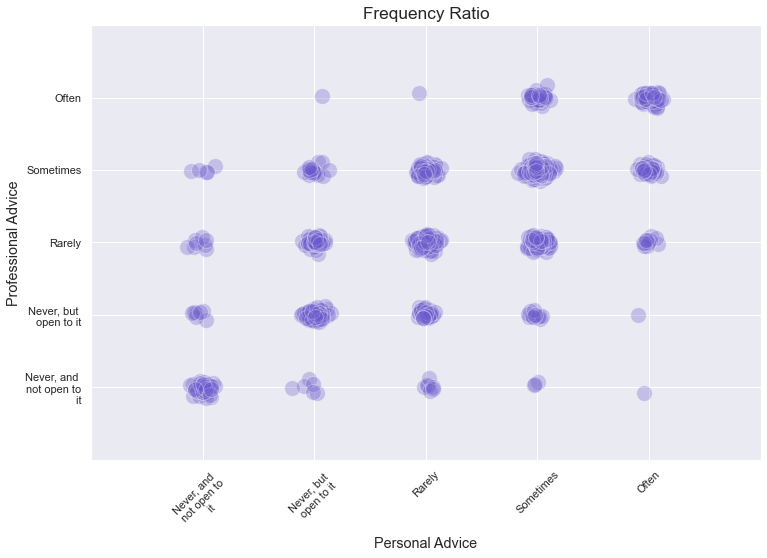

In [100]:
# Make all grids dark
sns.set(style='darkgrid')

def frequency_ratio(answers1, answers2, color, xlabel, ylabel):
    # Prepare figure and set up its size
    fig, ax = plt.subplots(figsize = (12,8))

    def jitter(values):
        return values + np.random.normal(0, 0.05, values.shape)

    # Draw scatter plot
    ax = sns.scatterplot(x=jitter(answers1), y=jitter(answers2), alpha=0.3, s=250, color=color, linewidth=1)

    # Add descriptions
    ax.set_title('Frequency Ratio', fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')
    
    ax.set_xlim(-1, 5, 1)
    ax.set_ylim(-1, 5, 1)

    # Get ticks and labels for graph from mapping dictionaries as tuples and sort them by numerical values
    ticks_labels = sorted([x for x in map_q7.items() if not np.isnan(x[1])], key=lambda x: x[1])
    # Get ticks from tuples, taking values under index 1
    ticks = [x[1] for x in ticks_labels]
    # Get labels from tuples, taking values under index 0
    labels = [x[0] for x in ticks_labels]
    # Add limit for number of characters in 1 line for ticks' labels
    max_chars = 11
    # Add line break after max_chars value for ticks' labels
    multiline_labels = ['\n'.join(label[i:i + max_chars ] 
                            for i in range(0, len(label), max_chars ))
                for label in labels]
    # Draw ticks and their labels
    ax.set_xticks(ticks=ticks, labels=multiline_labels, rotation=45)
    ax.set_yticks(ticks=ticks, labels=multiline_labels)
    
    return plt.show()

frequency_ratio(
    answers1=num_survey.q0007_0001, 
    answers2=num_survey.q0007_0002, 
    color='SlateBlue', 
    xlabel='Personal Advice', 
    ylabel='Professional Advice')

Result: data forms a slightly vague, but visible linear regression, meaning those who tend to ask with some frequency or not ask at all personal advices tend to miror the behaviour when it comes to professional advices.

Let's proceed with the next groups of answers to the same question: "How often would you say you ...
 - express physical affection to male friends?
 - get in a physical fight with another person?

Here we are trying to compare more or less spontaneous physical manifestations of positive and negative emotions among men.

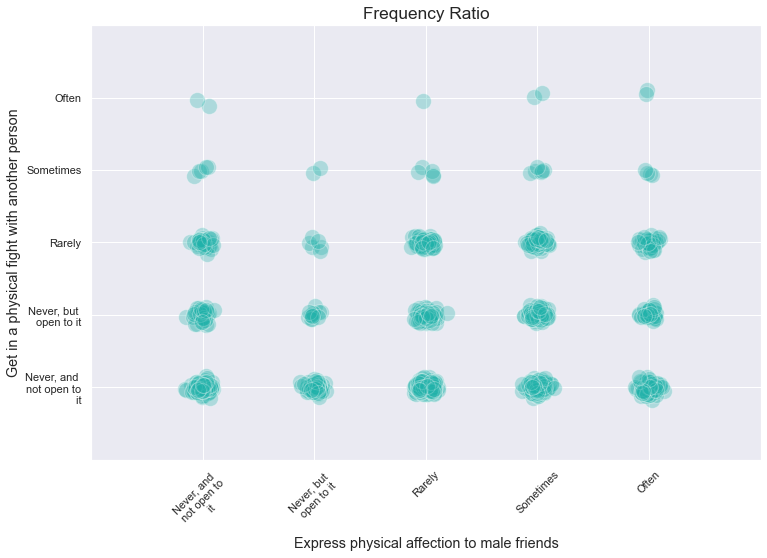

In [101]:
frequency_ratio(
    answers1=num_survey.q0007_0003, 
    answers2=num_survey.q0007_0005, 
    color='LightSeaGreen', 
    xlabel='Express physical affection to male friends', 
    ylabel='Get in a physical fight with another person')

Result: 
- We can clearly see that fighting is not so popular of a measure among contemporary men - there is a persistently low level of frequency of such measure among all "categories" of those who expresses or not expresses physical affection to male friends.

- We can also notice that men have a tendency to be specific in their expression of affection - more people are either do it with some frequency or never do it and not open to it. We can tell that because an option "Never, but open to it" contains visibly fewer votes than all other options which has visibly even number of votes across options: "Rarely"/"Never, but open to it"/"Never and not open to it" - describing frequency of physical fight participation.

Note: graph comparison of answers that describe frequencies of "crying" and "getting in fights" is very similar to the one above.

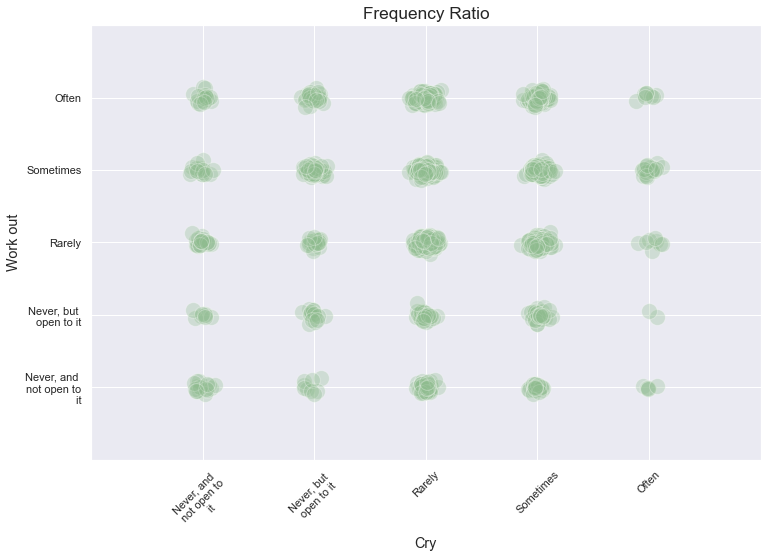

In [102]:
frequency_ratio(
    answers1=num_survey.q0007_0004, 
    answers2=num_survey.q0007_0009, 
    color='DarkSeaGreen', 
    xlabel='Cry', 
    ylabel='Work out')

Result: 
- Among the leading here are: an option when a person cries and works out equally rarely, as well as options when a person cries still rarely, but works out more often.
- In general, men tend to work out more often, than cry more often.


There are many other questions we could ask about this data. But for now let's switch to clustering to check whether they form based on traditionally "masculine concepts". 

## Build the K-Means++ Model

If we look at the first four sub-questions in question 7 we could conclude that described patterns are not necessarily seen as traditionally masculine. On the other hand, sub-questions 5, 8, and 9 are often seen as very masculine activities. What would happen if we found 2 clusters based on those 7 questions? Would we find clusters that represent traditionally feminine and traditionally masculine people? Let's find out.

To look throug demographic data after we form clasters we'll add the following columns to the subset: `race2`, `educ4`, `age3`, `kids`, `orientation` and `income` are going to subset only 7 variants of answers on the 7th question: 

1. Ask a friend for professional advice; 
2. Ask a friend for personal advice; 
3. Express physical affection to male friends, like hugging, rubbing shoulders; 
4. Cry; 
5. Get in a physical fight with another person; 
8. Watch sports of any kind; 
9. Work out; 


In [103]:
q7_dem = num_survey[[
    'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005', 'q0007_0008', 'q0007_0009',
    'race2', 'educ4', 'age3', 'kids', 'orientation', 'income'
]]


In [104]:
len(q7_dem)

1189

In [105]:
q7_dem = q7_dem.dropna()
len(q7_dem)

917

In [106]:
subset_q7 = q7_dem[[
    'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005', 'q0007_0008', 'q0007_0009', 
]]

In [107]:
inertia = []
num_clusters = range(1, 30)
for k in num_clusters:
    model = KMeans(init="k-means++", n_clusters=k, random_state=2)
    model.fit(subset_q7)
    inertia.append(model.inertia_)

<AxesSubplot:>

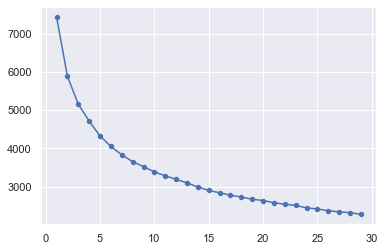

In [108]:
sns.lineplot(x=num_clusters, y=inertia)
sns.scatterplot(x=num_clusters, y=inertia, markers='o')

In [109]:
classifier = KMeans(init="k-means++", n_clusters=2, random_state=9)
classifier.fit(subset_q7)

KMeans(n_clusters=2, random_state=9)

In [110]:
classifier.cluster_centers_

array([[2.86348123, 2.83788396, 2.84982935, 2.37883959, 0.70989761,
        3.09215017, 2.90614334],
       [1.89425982, 1.86404834, 0.87613293, 1.73111782, 0.6163142 ,
        2.64954683, 1.93353474]])

Each cluster center corresponds to sub-question in question number 7:

1. Ask a friend for professional advice; 
2. Ask a friend for personal advice; 
3. Express physical affection to male friends, like hugging, rubbing shoulders; 
4. Cry; 
5. Get in a physical fight with another person; 
8. Watch sports of any kind; 
9. Work out; 

Result: When we look at the two clusters, the first four numbers represent the traditionally feminine activities and the last three represent the traditionally masculine activities. If the data points separated into a feminine cluser and a masculine cluseter, we would expect to see one cluster to have high values for the first four numbers and the other cluster to have high values for the last three numbers.

Instead, the second cluster has a higher value in feature except fighting. Since a higher number means the person was more likely to "often" do something, the clusters seem to represent "people who do things more often" and "people who don't do things or do them less often".

Let's check if clusters have some differences in demographic data.

In [111]:
# Put index on every label within each cluster
cluster0_indexes = [index for index, label in enumerate(classifier.labels_) if label == 0]
cluster1_indexes = [index for index, label in enumerate(classifier.labels_) if label == 1]

# Correspond indexes with dataframe containing demographic data
cluster0df = q7_dem.iloc[cluster0_indexes]
cluster1df = q7_dem.iloc[cluster1_indexes]

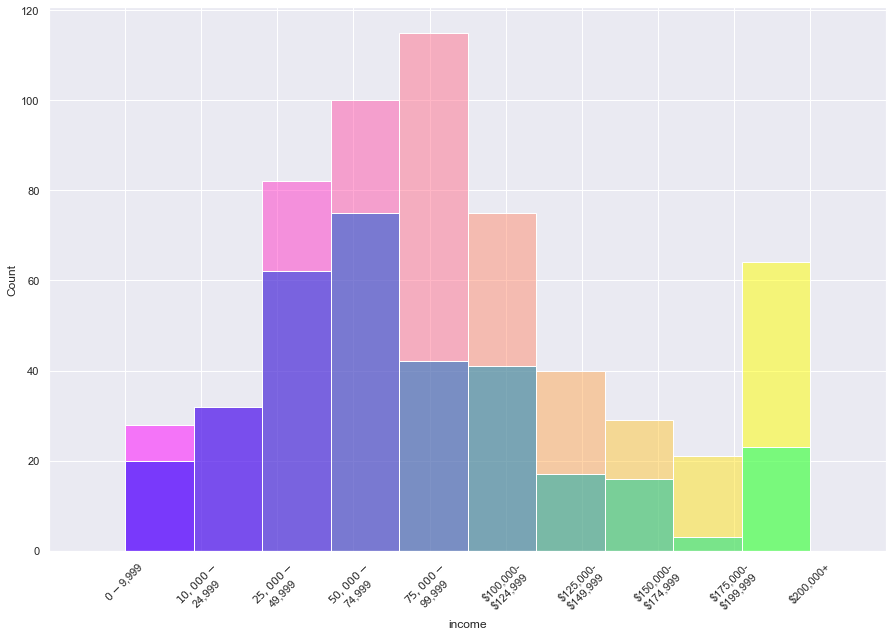

In [178]:
plt.figure(figsize = (15,10))
# Draw hisplot

ax = sns.histplot(
    x=cluster0df.income, 
    hue=cluster0df.income,
    # hue_order=hue_order, 
    multiple='layer', 
    # shrink=2.6,
    palette= 'spring',
    legend=False,
    bins=10
)

ax1 = sns.histplot(
    x=cluster1df.income, 
    hue=cluster1df.income,
    # hue_order=hue_order, 
    multiple='layer', 
    # shrink=2.6,
    palette= 'winter',
    legend=False,
    bins=10

)

ax.set_xlim(0, 11, 1) 

# Get ticks and labels for graph from mapping dictionaries as tuples and sort them by numerical values
ticks_labels = sorted([x for x in map_income.items() if not np.isnan(x[1])], key=lambda x: x[1])
# Get ticks from tuples, taking values under index 1
ticks = [x[1] for x in ticks_labels]
# Get labels from tuples, taking values under index 0
labels = [x[0] for x in ticks_labels]
# Add limit for number of characters in 1 line for ticks' labels
max_chars = 9
# Add line break after max_chars value for ticks' labels
multiline_labels = ['\n'.join(label[i:i + max_chars ] 
                        for i in range(0, len(label), max_chars ))
            for label in labels]
# Draw ticks and their labels
ax.set_xticks(ticks=ticks, labels=multiline_labels, rotation=45)

plt.show()

In [115]:
cluster0df.age3.value_counts()/len(cluster0df) * 100

35 - 64      47.610922
65 and up    45.221843
18 - 34       7.167235
Name: age3, dtype: float64

In [116]:
cluster1df.age3.value_counts()/len(cluster1df) * 100

65 and up    48.640483
35 - 64      46.223565
18 - 34       5.135952
Name: age3, dtype: float64

In [117]:
cluster0df.educ4.value_counts()/len(cluster0df) * 100

Post graduate degree    37.883959
College or more         33.105802
Some college            22.013652
High school or less      6.996587
Name: educ4, dtype: float64

In [118]:
cluster1df.educ4.value_counts()/len(cluster1df) * 100

Some college            32.628399
College or more         29.305136
Post graduate degree    24.169184
High school or less     13.897281
Name: educ4, dtype: float64

In [119]:
cluster0df.kids.value_counts()/len(cluster0df) * 100

Has children    68.259386
No children     31.740614
Name: kids, dtype: float64

In [120]:
cluster1df.kids.value_counts()/len(cluster1df) * 100

Has children    66.465257
No children     33.534743
Name: kids, dtype: float64

In [121]:
cluster0df.orientation.value_counts()/len(cluster0df) * 100

Straight        83.276451
Gay/Bisexual    13.993174
Other            2.218430
No answer        0.511945
Name: orientation, dtype: float64

In [122]:
cluster1df.orientation.value_counts()/len(cluster1df) * 100

Straight        90.936556
Gay/Bisexual     7.250755
Other            1.510574
No answer        0.302115
Name: orientation, dtype: float64

In [123]:
cluster0df.race2.value_counts()/len(cluster0df) * 100

White        85.836177
Non-white    14.163823
Name: race2, dtype: float64

In [124]:
cluster1df.race2.value_counts()/len(cluster1df) * 100

White        82.779456
Non-white    17.220544
Name: race2, dtype: float64

TBC